# Прикладной анализ данных

## Лабораторная работа 1. Тема: Прогнозирование моделью линейной регрессии

## Вариант 8
## Студент: Барсегян Л.Э
## Группа: ИУ6-55Б

### Задание 0. Загрузка данных

#### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#### Загрузка данных из файла


Для варианта 8 требуется выделить данные по следующим районам:

Северный, Центральный, Волго-Вятский, Северо-Кавказсий, Восточно-Сибирский, Дальневосточный районы.

В файле `data.xslx` данные именно по этим 6 районам. 

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
Y = df['Y'].values.reshape(47, 1)
X = df.iloc[:, 2:].values

print('Матрица целевых значений Y [47x1]:\n\n', Y, '\n')
print('Матрица целевых признаков X [47x9]:\n\n', X)

Матрица целевых значений Y [47x1]:

 [[54.7]
 [57. ]
 [71. ]
 [57.6]
 [57.7]
 [60.1]
 [58.5]
 [57.4]
 [58.5]
 [58.3]
 [58.2]
 [56.5]
 [59.2]
 [58.1]
 [58.8]
 [56.5]
 [57.1]
 [58.3]
 [59.4]
 [61.2]
 [60.4]
 [58.6]
 [57.5]
 [60.6]
 [65.9]
 [62.6]
 [63.9]
 [59.5]
 [59.4]
 [61. ]
 [59.4]
 [57.2]
 [49.7]
 [56. ]
 [56. ]
 [54.7]
 [56.2]
 [57. ]
 [55. ]
 [57.8]
 [57.8]
 [57.2]
 [58. ]
 [56.3]
 [55.7]
 [50.7]
 [58.9]] 

Матрица целевых признаков X [47x9]:

 [[8.500e+00 1.630e+01 6.800e+00 5.600e+00 1.740e+01 1.630e+02 1.510e+02
  2.360e+01 2.344e+03]
 [9.300e+00 1.260e+01 7.200e+00 5.500e+00 2.530e+01 1.940e+02 2.390e+02
  9.200e+00 1.809e+03]
 [8.700e+00 4.600e+00 6.500e+00 4.200e+00 1.620e+01 1.520e+02 1.920e+02
  2.690e+01 2.406e+03]
 [8.600e+00 6.200e+00 6.100e+00 4.000e+00 1.740e+01 1.900e+02 2.050e+02
  2.010e+01 2.023e+03]
 [8.100e+00 1.140e+01 7.700e+00 6.400e+00 5.900e+00 1.830e+02 1.980e+02
  2.200e+01 1.419e+03]
 [9.200e+00 1.590e+01 7.800e+00 5.300e+00 1.670e+01 1.690e+02 1.480e+02

### Задание 1. Нормирование (масштабирование) исходных данных

Посмотрим разброс данных, выведя минимальное и максимальное значение каждого столбца.

In [4]:
min_for_each_column = np.min(X, axis=0)
max_for_each_column = np.max(X, axis=0)

for i in range(X[0].size):
    print(f'x{i+1}\tmax: {max_for_each_column[i]}   \t\tmin: {min_for_each_column[i]}')

x1	max: 21.8   		min: 7.2
x2	max: 19.4   		min: 4.6
x3	max: 8.8   		min: 5.9
x4	max: 8.9   		min: 1.3
x5	max: 34.0   		min: 5.9
x6	max: 520.0   		min: 84.0
x7	max: 296.0   		min: 73.0
x8	max: 73.2   		min: 9.2
x9	max: 3588.0   		min: 673.0


Как видно, разброс данных большой. В таких случаях предлагается использовать Z-нормализацию, также известную как "Стандартизация". Этот метод подходит тем, что централизует данные и менее чувствителен к выборсам, в отличие от метода "Min-Max Scaler"

In [5]:
X_default = X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

Проверим разброс данных после нормализации

In [6]:
min_for_each_column = np.min(X, axis=0)
max_for_each_column = np.max(X, axis=0)

for i in range(X[0].size):
    print(f'x{i+1}\tmax: {max_for_each_column[i]}   \t\tmin: {min_for_each_column[i]}')

x1	max: 4.0649232076460375   		min: -0.9312263626328651
x2	max: 1.6749133436945007   		min: -2.842611750814593
x3	max: 2.659816158350041   		min: -1.9118476800246182
x4	max: 3.3684450611056977   		min: -2.590983249082291
x5	max: 3.5445550649128545   		min: -2.878735102801754
x6	max: 5.688722431962988   		min: -1.2742031489583807
x7	max: 3.266848667818195   		min: -2.0170773950525613
x8	max: 3.520026740730684   		min: -1.8489912786993128
x9	max: 2.5276934717121105   		min: -1.9105420859328077


### Задание 2. Расчет весов линейной регрессии по аналитической формуле 

Добавим единичный столбец в матрицу признаков

In [7]:
rows, coulmns = X.shape
X = np.hstack((np.ones((rows, 1)), X))

Аналитическая формула:

${w} = ({X}^{T}{X})^{-1}{X}^{T}{Y}$

In [8]:
covariance_matrix = np.matmul(np.transpose(X), X)
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
weights = np.matmul(np.matmul(inverse_covariance_matrix, np.transpose(X)), Y)

print(f'Полученные веса: \n{weights}')

Полученные веса: 
[[58.23617021]
 [-2.10483027]
 [-2.42128122]
 [ 0.95750726]
 [-2.14875258]
 [-0.32268881]
 [-0.30566366]
 [-1.15868994]
 [-0.84045299]
 [-0.79407424]]


### Задание 3. Построение и интепретация корреляционной матрицы. Определение степени мультиколлинеарности на основе числа обусловленности

In [9]:
print(f"Корреляционная матрица:\n{pd.DataFrame(X).corr()}\n")
print(f"Число обусловленности: {np.linalg.cond(X, p = 2)}")

Корреляционная матрица:
    0         1         2         3         4         5         6         7  \
0 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1 NaN  1.000000 -0.493003 -0.116073 -0.577910  0.250840 -0.376163 -0.392244   
2 NaN -0.493003  1.000000  0.106909  0.069805 -0.066190  0.238550  0.044261   
3 NaN -0.116073  0.106909  1.000000  0.392078 -0.086839  0.336084  0.164214   
4 NaN -0.577910  0.069805  0.392078  1.000000  0.124522  0.195631  0.293789   
5 NaN  0.250840 -0.066190 -0.086839  0.124522  1.000000 -0.240909 -0.145890   
6 NaN -0.376163  0.238550  0.336084  0.195631 -0.240909  1.000000  0.555050   
7 NaN -0.392244  0.044261  0.164214  0.293789 -0.145890  0.555050  1.000000   
8 NaN  0.646093 -0.211056 -0.258291 -0.548800  0.165603 -0.503291 -0.542994   
9 NaN -0.164474  0.046720 -0.312169  0.226796  0.191490 -0.111555  0.260572   

          8         9  
0       NaN       NaN  
1  0.646093 -0.164474  
2 -0.211056  0.046720  
3 -0.25829

Число обусловленности отражает, насколько чувствительна функция к изменениям или ошибкам на входе. В нашем случае число меньше 10, что говорит об отсутствии мультиколлинеарности в данных.

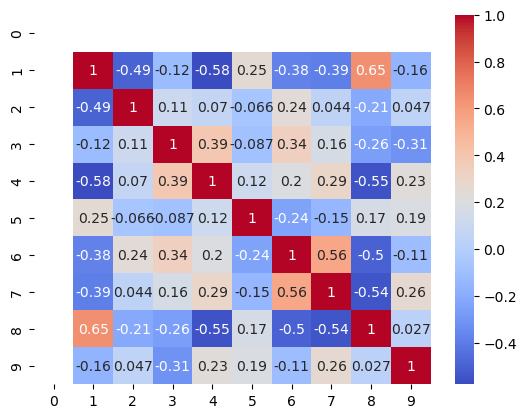

In [10]:
corr_plot = sns.heatmap(pd.DataFrame(X).corr(), cmap="coolwarm", annot=True)

### Задание 4. Анализ регрессионных остатков

In [11]:
Y_predicted = np.matmul(X, weights)
MSE = mean_squared_error(Y, Y_predicted)

RMSE = np.sqrt(MSE)
R2 = r2_score(Y, Y_predicted)

print(f'Среднее значение целевого признака: {Y_predicted.mean()}')
print(f'Регрессионные остатки:\n{Y - Y_predicted}')
print(f'Средняя квадратическая ошибка: {MSE}')
print(f'Среднеквадратическое отклонение: {RMSE}')
print(f'Коэффициент детерминации: {R2}')

Среднее значение целевого признака: 58.236170212765956
Регрессионные остатки:
[[-0.96144988]
 [-0.10408996]
 [ 6.22054103]
 [-6.11375592]
 [-2.57297791]
 [ 2.16177474]
 [ 0.24516254]
 [ 1.74814118]
 [ 1.09728299]
 [ 1.59256885]
 [-0.17323994]
 [-2.45024519]
 [-0.45042152]
 [-0.49187904]
 [ 0.8944499 ]
 [ 1.41952872]
 [ 0.75595762]
 [ 1.09422598]
 [-0.92879736]
 [-0.78676193]
 [-2.51217192]
 [-0.37782226]
 [-0.11757857]
 [ 0.35657876]
 [ 2.82229862]
 [-0.02902093]
 [ 1.15435909]
 [-1.71986617]
 [ 0.16712742]
 [ 1.2751612 ]
 [ 0.0917686 ]
 [-0.15930326]
 [-2.02611066]
 [-0.9612173 ]
 [ 2.31705158]
 [-1.40218124]
 [ 0.19436533]
 [-0.97957897]
 [-1.09572235]
 [-0.35676519]
 [ 1.42469739]
 [ 1.80810421]
 [ 0.64695609]
 [-0.70668967]
 [-0.28433281]
 [-2.21949279]
 [ 0.49337088]]
Средняя квадратическая ошибка: 3.2850653276126236
Среднеквадратическое отклонение: 1.8124749177885535
Коэффициент детерминации: 0.7001679445457348


### Задание 5. Определение весов линейной регрессии градиентным методом. Проанализировать изменение ошибки от итерации к итерации.

In [12]:
# 1. Инициализация весов
weights_i = np.ones((X.shape[1], 1))
learning_rate = 0.1

for i in range(200):
    # 2. Расчет таргета по весам
    Y_predicted_i =  np.matmul(X, weights_i)
    delta = Y - Y_predicted_i
    
    # 3. Расчет ошибки
    S_i = 0;
    for j in range(Y.shape[0]):
        S_i +=  (delta[j] ** 2 / Y.shape[0])[0]
    print(f"Итерация {i + 1}: \tОшибка: {S_i}")

    # 4. Расчет градиента функции потерь
    dS_dw = (- 2 / Y.shape[0]) * np.matmul(np.transpose(delta), X)
    # 5. Установка новых значений весов
    weights_i -= learning_rate * np.transpose(dS_dw)
    
    if i == 199:
        print(f"\t\tRMSE: {S_i**0.5}")
        R2_grad = r2_score(Y, Y_predicted_i)
        print(f"\t\tКоэффициент детерминации: {R2_grad}")

Итерация 1: 	Ошибка: 3305.4152047310754
Итерация 2: 	Ошибка: 2116.3691636098806
Итерация 3: 	Ошибка: 1356.7156026090056
Итерация 4: 	Ошибка: 870.6762073215934
Итерация 5: 	Ошибка: 559.5483026906915
Итерация 6: 	Ошибка: 360.3273491024967
Итерация 7: 	Ошибка: 232.7265776603901
Итерация 8: 	Ошибка: 150.97213076805838
Итерация 9: 	Ошибка: 98.5707728515132
Итерация 10: 	Ошибка: 64.96622942800421
Итерация 11: 	Ошибка: 43.40104313849901
Итерация 12: 	Ошибка: 29.54887913854076
Итерация 13: 	Ошибка: 20.639471798318528
Итерация 14: 	Ошибка: 14.89866918679994
Итерация 15: 	Ошибка: 11.190060429206483
Итерация 16: 	Ошибка: 8.785587361519333
Итерация 17: 	Ошибка: 7.218699624948974
Итерация 18: 	Ошибка: 6.190339971918246
Итерация 19: 	Ошибка: 5.508746232305139
Итерация 20: 	Ошибка: 5.0509016185869715
Итерация 21: 	Ошибка: 4.737845020306109
Итерация 22: 	Ошибка: 4.518855850177371
Итерация 23: 	Ошибка: 4.361321889110818
Итерация 24: 	Ошибка: 4.244246787678072
Итерация 25: 	Ошибка: 4.154088880491861
Ите

### Задание 6. Сравнение результатов по аналитическому и градиентному методу

Результаты аналитического метода:

    Средняя квадратическая ошибка: 3.2850653276126236
    Среднеквадратическое отклонение: 1.8124749177885535
    Коэффициент детерминации: 0.7001679445457348

Результаты градиентного метода:

    Ошибка: 3.285107199403924
	Среднеквадратическое отклонение: 1.8124864687505735
	Коэффициент детерминации: 0.7001641228545357

Аналитический метод оказался немного точнее.

### Задание 7.  С помощью библиотеки sklearn сделать fit-predict модели линейной регрессии. Сравнить результаты с ранее полученными.

In [16]:
model = LinearRegression().fit(X_default, Y)
Y_predicted_from_sklearn = model.predict(X_default)
MSE = mean_squared_error(Y, Y_predicted_from_sklearn)

print(f"MSE: {MSE}")
print(f"RMSE: {MSE **0.5}")
print(f"R2: {r2_score(Y, Y_predicted)}")

MSE: 3.2850653276126227
RMSE: 1.8124749177885533
R2: 0.700167944545735


Результат практически совпадает с предыдущими

### Задание 8. С помощью библиотеки statmodels получить «эконометрический» результат обучения модели линейной регрессии. Проинтерпретировать все его составляющие (в т.ч. те, которые изучались только теоретически), сравнить с предыдущими результатами

In [18]:
results = sm.OLS(Y, X).fit()
Y_predicted = results.predict(X)
MSE = mean_squared_error(Y, Y_predicted)

print(f"MSE: {MSE}")
print(f"RMSE: {MSE ** 0.5}")
print(f"R2: {r2_score(Y, Y_predicted)}")
print(results.summary())

MSE: 3.285065327612621
RMSE: 1.8124749177885526
R2: 0.700167944545735
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     9.600
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.27e-07
Time:                        21:11:07   Log-Likelihood:                -94.641
No. Observations:                  47   AIC:                             209.3
Df Residuals:                      37   BIC:                             227.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Задание 9. Сравнить качество получаемых моделей на основе коэффициента детерминации и MSE.
### Задание 10. Сделать итоговый вывод касательно причин различия в результатах при выполнении работ разными методами, а также по получаемым моделям в целом. Провести сравнительный анализ.

Для каждой из ранее полученных моделей была посчитаны метрики MSE, RMSE, R2. 
